In [32]:
from typing import Callable
from os import makedirs
from os.path import join
import numpy as np
import pandas as pd
from verma_net_radiation_sensitivity.verma_net_radiation_sensitivity import process_verma_net_radiation_table
from STIC_sensitivity import process_STIC_table
from sensitivity import perturbed_run, sensitivity_analysis
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
input_df = pd.read_csv("inputs.csv")
input_df = input_df[input_df.fAPARmax != 0]
input_df

,tower,lat,lon,orbit,scene,tile,date_UTC,doy,time_solar,AOT,...,Topt,fAPARmax,LE_insitu,H_insitu,Rn_insitu,G_insitu,SWin_insitu,SWout_insitu,LWin_insitu,LWout_insitu
0,US-Ha2,42.5393,-72.1779,9254,9,18TYN,2020-02-22,53,2020-02-21 19:11:17.304,0.088195,...,0.0,0.5545,23.770000,NaN,NaN,NaN,-1.680,0.758,266.0,307.0
1,US-Ha2,42.5393,-72.1779,10150,9,18TYN,2020-04-20,111,2020-04-19 19:11:17.304,0.237342,...,0.0,0.5545,37.980000,100.200000,128.80,NaN,-4.610,2.300,257.0,354.0
2,US-Ha2,42.5393,-72.1779,10352,9,18TYN,2020-05-03,124,2020-05-02 19:11:17.304,0.107484,...,0.0,0.5545,68.060000,152.300000,261.30,NaN,-4.050,0.952,316.0,419.0
3,US-Ha2,42.5393,-72.1779,10684,7,18TYN,2020-05-24,145,2020-05-23 19:11:17.304,0.094339,...,0.0,0.5545,NaN,NaN,NaN,NaN,-0.525,0.463,381.0,425.0
4,US-Ha2,42.5393,-72.1779,11069,8,18TYN,2020-06-18,170,2020-06-17 19:11:17.304,0.050474,...,0.0,0.5545,122.200000,292.500000,657.60,NaN,10.000,2.320,310.0,408.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,US-xUK,39.0404,-95.1921,10994,7,15SUD,2020-06-13,165,2020-06-12 17:39:13.896,0.107889,...,5.8,0.4664,NaN,NaN,368.81,17.024,347.290,67.140,411.0,488.9
132,US-xUK,39.0404,-95.1921,11909,6,15SUD,2020-08-11,224,2020-08-10 17:39:13.896,0.143261,...,5.8,0.4664,131.783751,6.519267,279.97,14.633,347.330,59.370,363.0,440.6
133,US-xUK,39.0404,-95.1921,16668,8,15SUD,2021-06-14,165,2021-06-13 17:39:13.896,0.121046,...,5.8,0.4664,NaN,NaN,NaN,NaN,347.290,67.140,411.0,488.9
134,US-xUK,39.0404,-95.1921,16810,8,15SUD,2021-06-23,174,2021-06-22 17:39:13.896,0.109902,...,5.8,0.4664,237.726708,187.862743,764.71,16.236,385.650,67.010,387.0,466.6


In [3]:
def process_verma_STIC_table(input_df: pd.DataFrame) -> pd.DataFrame:
    df = input_df.copy()
    df["Rn"] = df["Rn_insitu"]

    result = process_STIC_table(
        # process_verma_net_radiation_table(input_df),
        df,
        max_iterations=30,
        use_variable_alpha=False
    )

    return result

In [4]:
# input_df = pd.read_csv("calval_final_50_PTJPL_inputs.csv")

# if "Ta" in input_df and "Ta_C" not in input_df:
#     # input_df.rename({"Ta": "Ta_C"}, inplace=True)
#     input_df["Ta_C"] = input_df["Ta"]

# input_df = input_df[input_df.fAPARmax.apply(lambda fAPARmax: fAPARmax > 0.001)]
# input_df = input_df[input_df.NDVI.apply(lambda NDVI: NDVI > 0.05)]

# np.nanmin(input_df.ST_C), np.nanmax(input_df.ST_C)

In [5]:
processed = process_verma_STIC_table(input_df)
processed

[2024-11-19 18:50:26 INFO] variable Ms min: 0.000 mean: 0.417 max: 1.000 nan: 33.82%
[2024-11-19 18:50:26 INFO] running STIC iteration 1 / 30
[2024-11-19 18:50:26 INFO] completed STIC iteration 1 / 30 with max LE change: 254.981 (0.00 seconds)
[2024-11-19 18:50:26 INFO] variable SM_1 min: 0.000 mean: 0.404 max: 1.000 nan: 33.82%
[2024-11-19 18:50:26 INFO] variable G_1 min: 0.409 mean: 25.575 max: 103.700 nan: 52.21%
[2024-11-19 18:50:26 INFO] variable LE_1 min: 2.519 mean: 292.160 max: 635.330 nan: 52.94%
[2024-11-19 18:50:26 INFO] running STIC iteration 2 / 30
[2024-11-19 18:50:26 INFO] completed STIC iteration 2 / 30 with max LE change: 0.161 (0.00 seconds)
[2024-11-19 18:50:26 INFO] variable SM_2 min: 0.000 mean: 0.404 max: 1.000 nan: 33.82%
[2024-11-19 18:50:26 INFO] variable G_2 min: 0.409 mean: 25.575 max: 103.700 nan: 52.21%
[2024-11-19 18:50:26 INFO] variable LE_2 min: 2.519 mean: 292.156 max: 635.330 nan: 52.94%
[2024-11-19 18:50:26 INFO] max LE change 0.161 within convergence

/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/initialize_without_solar.py:65: RuntimeWarning: invalid value encountered in divide
  s44 = (SVP_hPa - Ea_hPa) / (Ta_C - Td_C)
/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/closure.py:49: RuntimeWarning: divide by zero encountered in divide
  gS = (-(2 * (phi_Wm2 * alpha * delta_hPa * Ea_hPa * gamma_hPa - phi_Wm2 * alpha * delta_hPa * Es_hPa * gamma_hPa)) / (Cp_Jkg * Estar_hPa ** 2 * gamma_hPa * rho_kgm3 - Cp_Jkg * Es_hPa ** 2 * gamma_hPa * rho_kgm3 - 2 * Cp_Jkg * delta_hPa * Es_hPa ** 2 * rho_kgm3 + 2 * Cp_Jkg * delta_hPa * Ea_hPa * Es_hPa * rho_kgm3 - 2 * Cp_Jkg * delta_hPa * Ea_hPa * Estar_hPa * rho_kgm3 + 2 * Cp_Jkg * delta_hPa * Es_hPa * Estar_hPa * rho_kgm3 + 2 * Cp_Jkg * Ea_hPa * Es_hPa * gamma_hPa * rho_kgm3 - 2 * Cp_Jkg * Ea_hPa * Estar_hPa * gamma_hPa * rho_kgm3 + Cp_Jkg * SM * Es_hPa ** 2 * gamma_hPa * rho_kgm3 + Cp_Jkg * SM * Estar_hPa ** 2 * gamma_hPa * rho_kgm3 - 2 * Cp_Jkg * SM * Es_hPa * Estar_hPa * gamma_hPa *

,tower,lat,lon,orbit,scene,tile,date_UTC,doy,time_solar,AOT,...,SWout_insitu,LWin_insitu,LWout_insitu,LE_max_change,iteration,LE,LE_change,LEt,PT,G
0,US-Ha2,42.5393,-72.1779,9254,9,18TYN,2020-02-22,53,2020-02-21 19:11:17.304,0.088195,...,0.758,266.0,307.0,0.161413,2,NaN,NaN,NaN,NaN,NaN
1,US-Ha2,42.5393,-72.1779,10150,9,18TYN,2020-04-20,111,2020-04-19 19:11:17.304,0.237342,...,2.300,257.0,354.0,0.161413,2,8.304808,0.000446,7.168656,54.839839,13.975096
2,US-Ha2,42.5393,-72.1779,10352,9,18TYN,2020-05-03,124,2020-05-02 19:11:17.304,0.107484,...,0.952,316.0,419.0,0.161413,2,183.928316,0.000000,16.595797,186.058419,10.667777
3,US-Ha2,42.5393,-72.1779,10684,7,18TYN,2020-05-24,145,2020-05-23 19:11:17.304,0.094339,...,0.463,381.0,425.0,0.161413,2,NaN,NaN,NaN,NaN,NaN
4,US-Ha2,42.5393,-72.1779,11069,8,18TYN,2020-06-18,170,2020-06-17 19:11:17.304,0.050474,...,2.320,310.0,408.0,0.161413,2,485.103207,0.000000,249.706039,639.065651,30.540498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,US-xUK,39.0404,-95.1921,10994,7,15SUD,2020-06-13,165,2020-06-12 17:39:13.896,0.107889,...,67.140,411.0,488.9,0.161413,2,304.217649,0.000000,166.379664,400.275822,19.411566
132,US-xUK,39.0404,-95.1921,11909,6,15SUD,2020-08-11,224,2020-08-10 17:39:13.896,0.143261,...,59.370,363.0,440.6,0.161413,2,255.163126,0.000000,96.799500,373.116568,24.806874
133,US-xUK,39.0404,-95.1921,16668,8,15SUD,2021-06-14,165,2021-06-13 17:39:13.896,0.121046,...,67.140,411.0,488.9,0.161413,2,NaN,NaN,NaN,NaN,NaN
134,US-xUK,39.0404,-95.1921,16810,8,15SUD,2021-06-23,174,2021-06-22 17:39:13.896,0.109902,...,67.010,387.0,466.6,0.161413,2,NaN,NaN,NaN,NaN,26.436100


In [6]:
processed.columns

Index(['tower', 'lat', 'lon', 'orbit', 'scene', 'tile', 'date_UTC', 'doy',
       'time_solar', 'AOT', 'COT', 'vapor_gccm', 'ozone_cm', 'SZA', 'KG',
       'BESSinst', 'ESI', 'ESIdaily', 'ESIdailyUncertainty', 'ETdaily',
       'ETdailyUncertainty', 'ETinstUncertainty', 'EmisWB', 'GPP', 'LST',
       'LST_err', 'MOD16inst', 'NDVI-UQ', 'PET', 'PTJPLSMcanopy',
       'PTJPLSMinst', 'PTJPLSMinterception', 'PTJPLSMsoil', 'RH', 'Rg', 'Rn',
       'SM', 'STICcanopy', 'STICinst', 'Ta', 'WUE', 'albedo-UQ', 'height',
       'radiance_1', 'radiance_2', 'radiance_3', 'radiance_4', 'radiance_5',
       'view_zenith', 'year', 'Ta_C', 'ST_K', 'NDVI', 'albedo', 'ST_C',
       'elevation_km', 'Ra', 'UV', 'VIS', 'NIR', 'VISdiff', 'NIRdiff',
       'VISdir', 'NIRdir', 'SWout', 'LWin', 'LWout', 'hour_of_day', 'Topt',
       'fAPARmax', 'LE_insitu', 'H_insitu', 'Rn_insitu', 'G_insitu',
       'SWin_insitu', 'SWout_insitu', 'LWin_insitu', 'LWout_insitu',
       'LE_max_change', 'iteration', 'LE', 'LE_chang

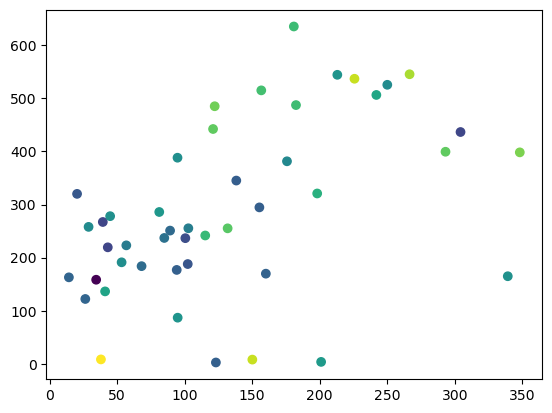

In [7]:
plt.scatter(x=processed.LE_insitu, y=processed.LE, c=processed.ST_C)

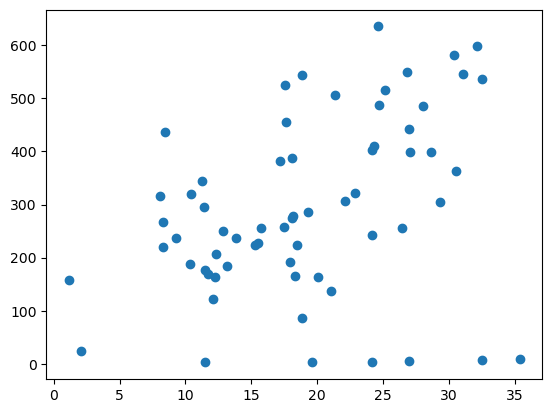

In [8]:
plt.scatter(x=processed.ST_C, y=processed.LE)

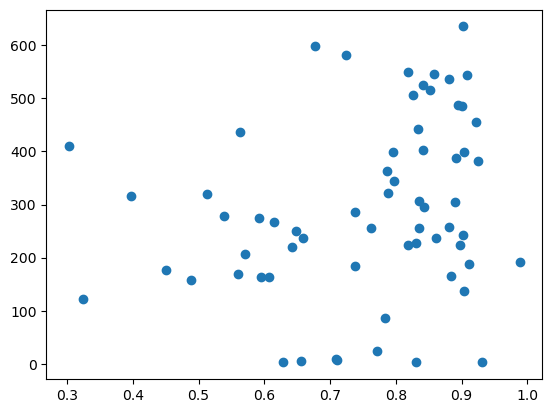

In [9]:
plt.scatter(x=processed.NDVI, y=processed.LE)

In [25]:
input_variable = "ST_C"
output_variable = "LE"
results = perturbed_run(input_df, input_variable, output_variable, process_verma_STIC_table)
results

[2024-11-19 18:58:01 INFO] variable Ms min: 0.000 mean: 0.417 max: 1.000 nan: 33.82%
[2024-11-19 18:58:01 INFO] running STIC iteration 1 / 30
[2024-11-19 18:58:01 INFO] completed STIC iteration 1 / 30 with max LE change: 254.981 (0.00 seconds)
[2024-11-19 18:58:01 INFO] variable SM_1 min: 0.000 mean: 0.404 max: 1.000 nan: 33.82%
[2024-11-19 18:58:01 INFO] variable G_1 min: 0.409 mean: 25.575 max: 103.700 nan: 52.21%
[2024-11-19 18:58:01 INFO] variable LE_1 min: 2.519 mean: 292.160 max: 635.330 nan: 52.94%
[2024-11-19 18:58:01 INFO] running STIC iteration 2 / 30
[2024-11-19 18:58:01 INFO] completed STIC iteration 2 / 30 with max LE change: 0.161 (0.00 seconds)
[2024-11-19 18:58:01 INFO] variable SM_2 min: 0.000 mean: 0.404 max: 1.000 nan: 33.82%
[2024-11-19 18:58:01 INFO] variable G_2 min: 0.409 mean: 25.575 max: 103.700 nan: 52.21%
[2024-11-19 18:58:01 INFO] variable LE_2 min: 2.519 mean: 292.156 max: 635.330 nan: 52.94%
[2024-11-19 18:58:01 INFO] max LE change 0.161 within convergence

/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/initialize_without_solar.py:65: RuntimeWarning: invalid value encountered in divide
  s44 = (SVP_hPa - Ea_hPa) / (Ta_C - Td_C)
/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/closure.py:49: RuntimeWarning: divide by zero encountered in divide
  gS = (-(2 * (phi_Wm2 * alpha * delta_hPa * Ea_hPa * gamma_hPa - phi_Wm2 * alpha * delta_hPa * Es_hPa * gamma_hPa)) / (Cp_Jkg * Estar_hPa ** 2 * gamma_hPa * rho_kgm3 - Cp_Jkg * Es_hPa ** 2 * gamma_hPa * rho_kgm3 - 2 * Cp_Jkg * delta_hPa * Es_hPa ** 2 * rho_kgm3 + 2 * Cp_Jkg * delta_hPa * Ea_hPa * Es_hPa * rho_kgm3 - 2 * Cp_Jkg * delta_hPa * Ea_hPa * Estar_hPa * rho_kgm3 + 2 * Cp_Jkg * delta_hPa * Es_hPa * Estar_hPa * rho_kgm3 + 2 * Cp_Jkg * Ea_hPa * Es_hPa * gamma_hPa * rho_kgm3 - 2 * Cp_Jkg * Ea_hPa * Estar_hPa * gamma_hPa * rho_kgm3 + Cp_Jkg * SM * Es_hPa ** 2 * gamma_hPa * rho_kgm3 + Cp_Jkg * SM * Estar_hPa ** 2 * gamma_hPa * rho_kgm3 - 2 * Cp_Jkg * SM * Es_hPa * Estar_hPa * gamma_hPa *

,input_variable,output_variable,input_unperturbed,input_perturbation,input_perturbation_std,input_perturbed,output_unperturbed,output_perturbation,output_perturbation_std,output_perturbed
0,ST_C,LE,0.89,-4.323406,-0.518816,-3.433406,NaN,NaN,NaN,NaN
1,ST_C,LE,0.89,-0.870345,-0.104443,0.019655,NaN,NaN,NaN,NaN
2,ST_C,LE,0.89,0.654668,0.078561,1.544668,NaN,NaN,NaN,NaN
3,ST_C,LE,0.89,-2.790338,-0.334845,-1.900338,NaN,NaN,NaN,NaN
4,ST_C,LE,0.89,0.710132,0.085217,1.600132,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
13595,ST_C,LE,6.47,15.395254,1.847455,21.865254,NaN,NaN,NaN,NaN
13596,ST_C,LE,6.47,8.436243,1.012363,14.906243,NaN,NaN,NaN,NaN
13597,ST_C,LE,6.47,0.018425,0.002211,6.488425,NaN,NaN,NaN,NaN
13598,ST_C,LE,6.47,-4.070315,-0.488444,2.399685,NaN,NaN,NaN,NaN


In [30]:
# input_variables = ["LST", "NDVI", "albedo", "Ta_C", "RH", "Rg"]
input_variables = ["ST_C", "NDVI", "albedo", "Ta_C", "RH"]
output_variables = ["LE"]

perturbation_df, sensitivity_metrics_df = sensitivity_analysis(
    input_df=input_df,
    input_variables=input_variables,
    output_variables=output_variables,
    forward_process=process_verma_STIC_table
)

sensitivity_metrics_df

136
90
[2024-11-19 18:59:21 INFO] variable Ms min: 0.000 mean: 0.417 max: 1.000 nan: 0.00%
[2024-11-19 18:59:21 INFO] running STIC iteration 1 / 30
[2024-11-19 18:59:21 INFO] completed STIC iteration 1 / 30 with max LE change: 254.981 (0.00 seconds)
[2024-11-19 18:59:21 INFO] variable SM_1 min: 0.000 mean: 0.404 max: 1.000 nan: 0.00%
[2024-11-19 18:59:21 INFO] variable G_1 min: 0.409 mean: 25.561 max: 103.700 nan: 28.89%
[2024-11-19 18:59:21 INFO] variable LE_1 min: 2.519 mean: 292.160 max: 635.330 nan: 28.89%
[2024-11-19 18:59:21 INFO] running STIC iteration 2 / 30
[2024-11-19 18:59:21 INFO] completed STIC iteration 2 / 30 with max LE change: 0.161 (0.00 seconds)
[2024-11-19 18:59:21 INFO] variable SM_2 min: 0.000 mean: 0.404 max: 1.000 nan: 0.00%
[2024-11-19 18:59:21 INFO] variable G_2 min: 0.409 mean: 25.561 max: 103.700 nan: 28.89%
[2024-11-19 18:59:21 INFO] variable LE_2 min: 2.519 mean: 292.156 max: 635.330 nan: 28.89%
[2024-11-19 18:59:21 INFO] max LE change 0.161 within converg

/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/initialize_without_solar.py:65: RuntimeWarning: invalid value encountered in divide
  s44 = (SVP_hPa - Ea_hPa) / (Ta_C - Td_C)
/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/closure.py:49: RuntimeWarning: divide by zero encountered in divide
  gS = (-(2 * (phi_Wm2 * alpha * delta_hPa * Ea_hPa * gamma_hPa - phi_Wm2 * alpha * delta_hPa * Es_hPa * gamma_hPa)) / (Cp_Jkg * Estar_hPa ** 2 * gamma_hPa * rho_kgm3 - Cp_Jkg * Es_hPa ** 2 * gamma_hPa * rho_kgm3 - 2 * Cp_Jkg * delta_hPa * Es_hPa ** 2 * rho_kgm3 + 2 * Cp_Jkg * delta_hPa * Ea_hPa * Es_hPa * rho_kgm3 - 2 * Cp_Jkg * delta_hPa * Ea_hPa * Estar_hPa * rho_kgm3 + 2 * Cp_Jkg * delta_hPa * Es_hPa * Estar_hPa * rho_kgm3 + 2 * Cp_Jkg * Ea_hPa * Es_hPa * gamma_hPa * rho_kgm3 - 2 * Cp_Jkg * Ea_hPa * Estar_hPa * gamma_hPa * rho_kgm3 + Cp_Jkg * SM * Es_hPa ** 2 * gamma_hPa * rho_kgm3 + Cp_Jkg * SM * Estar_hPa ** 2 * gamma_hPa * rho_kgm3 - 2 * Cp_Jkg * SM * Es_hPa * Estar_hPa * gamma_hPa *


input_perturbation_std
100     0.704097
101     0.352314
102     0.648541
103    -0.392254
104     0.620711
          ...   
8995   -0.745583
8996   -0.321681
8997    0.179144
8998   -1.637753
8999    0.623441
Name: input_perturbation_std, Length: 6400, dtype: float32
output_perturbation_std
100    -0.000472
101    -0.000236
102    -0.000435
103     0.000263
104    -0.000416
          ...   
8995    0.009981
8996    0.004306
8997   -0.002398
8998    0.021925
8999   -0.008346
Name: output_perturbation_std, Length: 6400, dtype: float32
correlation: -0.7288919978161652
[2024-11-19 18:59:21 INFO] variable Ms min: 0.000 mean: 0.417 max: 1.000 nan: 0.00%
[2024-11-19 18:59:21 INFO] running STIC iteration 1 / 30
[2024-11-19 18:59:21 INFO] completed STIC iteration 1 / 30 with max LE change: 254.981 (0.00 seconds)
[2024-11-19 18:59:21 INFO] variable SM_1 min: 0.000 mean: 0.404 max: 1.000 nan: 0.00%
[2024-11-19 18:59:21 INFO] variable G_1 min: 0.409 mean: 25.561 max: 103.700 nan: 28.89%
[2024-11

/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/initialize_without_solar.py:65: RuntimeWarning: invalid value encountered in divide
  s44 = (SVP_hPa - Ea_hPa) / (Ta_C - Td_C)
/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/closure.py:49: RuntimeWarning: divide by zero encountered in divide
  gS = (-(2 * (phi_Wm2 * alpha * delta_hPa * Ea_hPa * gamma_hPa - phi_Wm2 * alpha * delta_hPa * Es_hPa * gamma_hPa)) / (Cp_Jkg * Estar_hPa ** 2 * gamma_hPa * rho_kgm3 - Cp_Jkg * Es_hPa ** 2 * gamma_hPa * rho_kgm3 - 2 * Cp_Jkg * delta_hPa * Es_hPa ** 2 * rho_kgm3 + 2 * Cp_Jkg * delta_hPa * Ea_hPa * Es_hPa * rho_kgm3 - 2 * Cp_Jkg * delta_hPa * Ea_hPa * Estar_hPa * rho_kgm3 + 2 * Cp_Jkg * delta_hPa * Es_hPa * Estar_hPa * rho_kgm3 + 2 * Cp_Jkg * Ea_hPa * Es_hPa * gamma_hPa * rho_kgm3 - 2 * Cp_Jkg * Ea_hPa * Estar_hPa * gamma_hPa * rho_kgm3 + Cp_Jkg * SM * Es_hPa ** 2 * gamma_hPa * rho_kgm3 + Cp_Jkg * SM * Estar_hPa ** 2 * gamma_hPa * rho_kgm3 - 2 * Cp_Jkg * SM * Es_hPa * Estar_hPa * gamma_hPa *

,input_variable,output_variable,metric,value
0,ST_C,LE,correlation,0.006841
0,ST_C,LE,r2,0.000047
0,NDVI,LE,correlation,0.681341
0,NDVI,LE,r2,0.464225
0,albedo,LE,correlation,-0.728892
0,albedo,LE,r2,0.531284
0,Ta_C,LE,correlation,0.134399
0,Ta_C,LE,r2,0.018063
0,RH,LE,correlation,0.364386
0,RH,LE,r2,0.132777


Text(0.5, 1.0, 'STIC Latent Heat Flux Sensitivity')

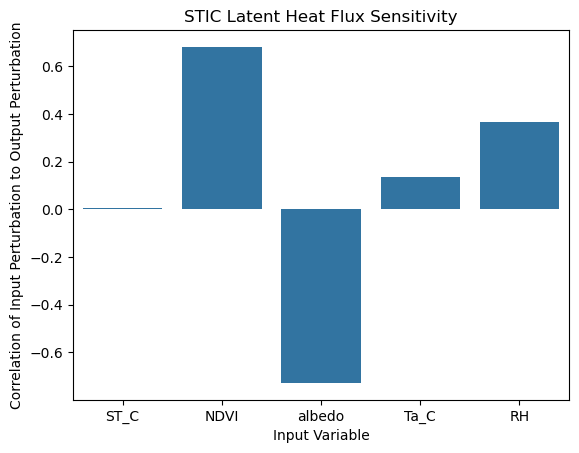

In [33]:
df = sensitivity_metrics_df
df = df[(df.output_variable == "LE") & (df.metric == "correlation")]
ax = sns.barplot(x=df.input_variable, y=df.value)
# ax.set_xticklabels(["albedo", "aerosol", "cloud\nthickness", "water\nvapor", "ozone", "elevation"])
plt.xlabel("Input Variable")
plt.ylabel("Correlation of Input Perturbation to Output Perturbation")
plt.title("STIC Latent Heat Flux Sensitivity")